In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import joblib
from bayes_opt import BayesianOptimization
from sklearn.neural_network import MLPRegressor
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

import warnings
warnings.simplefilter('ignore')

import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

data = pd.read_csv('..\data\PFdata4ML.csv')

X = data.iloc[:,data.columns != "pf_log"]
y = data.iloc[:,data.columns == "pf_log"]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.1,random_state=1709)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
    
scaler.fit(Xtrain)
scaler.fit(Xtest)
X_train = scaler.transform(Xtrain)
X_test = scaler.transform(Xtest)

train_error_list = []
test_error_list = []
final_error_list = []

(328, 21) (37, 21) (328, 1) (37, 1)


In [2]:
def MLP(alphas,node1,node2,node3):
    alphas=alphas
    solver='lbfgs'

    if int(node2)==0:
        layer_sizes=[int(node1)]
    elif int(node3)==0:
        layer_sizes=[int(node1),int(node2)]
    else:
        layer_sizes=[int(node1),int(node2),int(node3)]
        
    print(layer_sizes)

    mlp = MLPRegressor(solver=solver,alpha=alphas,
                       hidden_layer_sizes=layer_sizes, max_iter=1000,
                       verbose=False, tol=0.0001)
    
    mlp.fit(X_train,Ytrain.values.ravel())
    res = mlp.predict(X_test)
    print("solver: %s" % solver)
    print("Training set score: %f" % mlp.score(X_train,Ytrain))
    print("Test set score: %f" % mlp.score(X_test,Ytest))
    
    train_error=mlp.score(X_train,Ytrain)
    test_error=mlp.score(X_test,Ytest)
    final_error=0.9*train_error+0.1*test_error
#     name = './'+ str(final_error)+'_'+ str(test_error)+'_'+str(train_error) +'mlp.model'    
#     joblib.dump(mlp, name)
    train_error_list.append(train_error)
    test_error_list.append(test_error)
    final_error_list.append(final_error)

    return test_error

In [3]:
pbounds = {'alphas': (1e-5, 1),"node1":(1,256),"node2":(0,256),"node3":(0,256)}
optimizer = BayesianOptimization(f=MLP,pbounds=pbounds,random_state=1)
bo=optimizer.maximize(init_points=20,n_iter=200)

|   iter    |  target   |  alphas   |   node1   |   node2   |   node3   |
-------------------------------------------------------------------------
[184]
solver: lbfgs
Training set score: 0.995071
Test set score: 0.945598
| 1         | 0.9456    | 0.417     | 184.7     | 0.02928   | 0.0       |
[24, 47]
solver: lbfgs
Training set score: 0.997687
Test set score: 0.953579
| 2         | 0.9536    | 0.1468    | 24.55     | 47.68     | 0.0       |
[138, 107]
solver: lbfgs
Training set score: 0.998985
Test set score: 0.953039
| 3         | 0.953     | 0.3968    | 138.4     | 107.3     | 0.0       |
[224, 7]
solver: lbfgs
Training set score: 0.995175
Test set score: 0.932120
| 4         | 0.9321    | 0.2045    | 224.9     | 7.011     | 0.0       |
[143, 35]
solver: lbfgs
Training set score: 0.998952
Test set score: 0.959756
| 5         | 0.9598    | 0.4173    | 143.5     | 35.94     | 0.0       |
[247, 80]
solver: lbfgs
Training set score: 0.998530
Test set score: 0.953556
| 6         | 0.953

solver: lbfgs
Training set score: 0.999724
Test set score: 0.927525
| 41        | 0.9275    | 0.1014    | 68.79     | 125.4     | 0.0       |
[54, 247]
solver: lbfgs
Training set score: 0.999898
Test set score: 0.945327
| 42        | 0.9453    | 0.002956  | 54.41     | 247.5     | 0.0       |
[156, 155]
solver: lbfgs
Training set score: 0.998573
Test set score: 0.965229
| 43        | 0.9652    | 0.6635    | 156.7     | 155.2     | 0.0       |
[207, 103]
solver: lbfgs
Training set score: 0.999374
Test set score: 0.952236
| 44        | 0.9522    | 0.3471    | 207.7     | 103.1     | 0.0       |
[184, 165]
solver: lbfgs
Training set score: 0.999417
Test set score: 0.964712
| 45        | 0.9647    | 0.3264    | 184.4     | 165.3     | 0.0       |
[32, 248]
solver: lbfgs
Training set score: 0.999789
Test set score: 0.948143
| 46        | 0.9481    | 0.05724   | 32.29     | 248.7     | 0.0       |
[35, 52]
solver: lbfgs
Training set score: 0.998042
Test set score: 0.961946
| 47        | 0.96

solver: lbfgs
Training set score: 0.992367
Test set score: 0.950778
| 82        | 0.9508    | 0.9613    | 19.79     | 203.6     | 0.0       |
[230, 6]
solver: lbfgs
Training set score: 0.974051
Test set score: 0.942819
| 83        | 0.9428    | 0.3467    | 230.9     | 6.117     | 0.0       |
[58, 164]
solver: lbfgs
Training set score: 0.999662
Test set score: 0.970301
| 84        | 0.9703    | 0.1562    | 58.48     | 164.8     | 0.0       |
[64, 248]
solver: lbfgs
Training set score: 0.999704
Test set score: 0.958107
| 85        | 0.9581    | 0.09224   | 64.06     | 248.5     | 0.0       |
[106, 229]
solver: lbfgs
Training set score: 0.998627
Test set score: 0.945442
| 86        | 0.9454    | 0.6246    | 106.0     | 229.5     | 0.0       |
[27, 84]
solver: lbfgs
Training set score: 0.996023
Test set score: 0.959016
| 87        | 0.959     | 0.67      | 27.89     | 84.99     | 0.0       |
[91, 38]
solver: lbfgs
Training set score: 0.998351
Test set score: 0.959482
| 88        | 0.9595  

solver: lbfgs
Training set score: 0.985501
Test set score: 0.931352
| 123       | 0.9314    | 0.9048    | 8.855     | 124.2     | 0.0       |
[115, 174]
solver: lbfgs
Training set score: 0.997738
Test set score: 0.953931
| 124       | 0.9539    | 0.7991    | 115.1     | 174.9     | 0.0       |
[221, 118]
solver: lbfgs
Training set score: 0.998730
Test set score: 0.955908
| 125       | 0.9559    | 0.665     | 221.4     | 118.9     | 0.0       |
[52, 196]
solver: lbfgs
Training set score: 0.998644
Test set score: 0.957538
| 126       | 0.9575    | 0.4411    | 52.93     | 196.7     | 0.0       |
[82, 93]
solver: lbfgs
Training set score: 0.999399
Test set score: 0.955515
| 127       | 0.9555    | 0.2638    | 82.66     | 93.06     | 0.0       |
[41, 147]
solver: lbfgs
Training set score: 0.999724
Test set score: 0.968912
| 128       | 0.9689    | 0.1239    | 41.72     | 147.1     | 0.0       |
[98, 175]
solver: lbfgs
Training set score: 0.997251
Test set score: 0.945662
| 129       | 0.945

solver: lbfgs
Training set score: 0.998225
Test set score: 0.954766
| 164       | 0.9548    | 0.8243    | 254.3     | 67.92     | 0.0       |
[151, 88]
solver: lbfgs
Training set score: 0.998837
Test set score: 0.950733
| 165       | 0.9507    | 0.4849    | 151.3     | 88.25     | 0.0       |
[121, 110]
solver: lbfgs
Training set score: 0.998114
Test set score: 0.963156
| 166       | 0.9632    | 0.8676    | 121.6     | 110.2     | 0.0       |
[156, 218]
solver: lbfgs
Training set score: 0.997787
Test set score: 0.953987
| 167       | 0.954     | 0.905     | 156.8     | 218.6     | 0.0       |
[167, 215]
solver: lbfgs
Training set score: 0.998022
Test set score: 0.955910
| 168       | 0.9559    | 0.932     | 167.2     | 216.0     | 0.0       |
[92, 144]
solver: lbfgs
Training set score: 0.998325
Test set score: 0.956541
| 169       | 0.9565    | 0.607     | 92.13     | 144.5     | 0.0       |
[135, 104]
solver: lbfgs
Training set score: 0.997665
Test set score: 0.958845
| 170       | 0.

[21, 61]
solver: lbfgs
Training set score: 0.997381
Test set score: 0.957842
| 205       | 0.9578    | 0.4357    | 21.11     | 61.81     | 0.0       |
[67, 92]
solver: lbfgs
Training set score: 0.997594
Test set score: 0.950597
| 206       | 0.9506    | 0.6496    | 67.64     | 92.53     | 0.0       |
[35, 109]
solver: lbfgs
Training set score: 0.996609
Test set score: 0.952907
| 207       | 0.9529    | 0.7357    | 35.39     | 109.6     | 0.0       |
[35, 130]
solver: lbfgs
Training set score: 0.998332
Test set score: 0.954546
| 208       | 0.9545    | 0.3471    | 35.78     | 130.5     | 0.0       |
[148, 240]
solver: lbfgs
Training set score: 0.999310
Test set score: 0.952259
| 209       | 0.9523    | 0.3483    | 148.4     | 240.8     | 0.0       |
[44, 133]
solver: lbfgs
Training set score: 0.999712
Test set score: 0.956326
| 210       | 0.9563    | 0.06921   | 44.6      | 133.7     | 0.0       |
[222, 17]
solver: lbfgs
Training set score: 0.999153
Test set score: 0.955401
| 211      

In [4]:
mlp = joblib.load(r'./MLP.model')

scaler.fit(Xtrain)
scaler.fit(Xtest)
X_train = scaler.transform(Xtrain)
X_test = scaler.transform(Xtest)

In [10]:
# R2
Ytrain_pre = mlp.predict(X_train)
print(f'Train_R2_score is {mlp.score(X_train,Ytrain.values.ravel()):.4f}')

# RMSE
train_rmse = np.sqrt(mean_squared_error(Ytrain.values.ravel(),Ytrain_pre))
print(f'Train_RMSE is {train_rmse:.4f}')

# MSE
train_mse = mean_squared_error(Ytrain.values.ravel(),Ytrain_pre)
print(f'Train_MSE is {train_mse:.4f}')

# MAE
train_mae = mean_absolute_error(Ytrain.values.ravel(),Ytrain_pre)
print(f'Train_MAE is {train_mae:.4f}')

Train_R2_score is 0.9999
Train_RMSE is 0.0283
Train_MSE is 0.0008
Train_MAE is 0.0114


In [11]:
# R2
Ytest_pre = mlp.predict(X_test)
print(f'Test_R2_score is {mlp.score(X_test,Ytest.values.ravel()):.4f}')

# RMSE
test_rmse = np.sqrt(mean_squared_error(Ytest.values.ravel(),Ytest_pre))
print(f'Test_RMSE is {test_rmse:.4f}')

# MSE
test_mse = mean_squared_error(Ytest.values.ravel(),Ytest_pre)
print(f'Test_MSE is {test_mse:.4f}')

# MAE
test_mae = mean_absolute_error(Ytest.values.ravel(),Ytest_pre)
print(f'Test_MAE is {test_mae:.4f}')

Test_R2_score is 0.9745
Test_RMSE is 0.4259
Test_MSE is 0.1814
Test_MAE is 0.2753


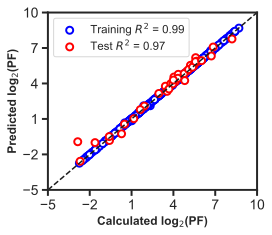

In [12]:
fig, axes = plt.subplots(1, 1, sharey=True, figsize=(4,3.5))
sns.set_style('ticks')

fig1 = sns.scatterplot(x = Ytrain.values.ravel(),
                       y = Ytrain_pre,
                       ec="blue",
                       linewidth = 2,
                       alpha=1,
                       color = 'w',
                       marker='o',
                       s = 50,
                       )

fig2 = sns.scatterplot(x = Ytest.values.ravel(),
                       y = Ytest_pre,
                       ec="red",
                       linewidth = 2,
                       alpha=1,
                       color = 'w',
                       marker='o',
                       s = 50,
                       )

plt.legend(labels=["Training $R^2$ = 0.99","Test $R^2$ = 0.97"],loc="upper left",fontsize=11.5)  

title='Calculated log$_2$(PF)'
title1='Predicted log$_2$(PF)'
plt.xlabel(title,
          fontsize=12,
          fontweight='bold')
plt.ylabel(title1,
          fontsize=12,
          fontweight='bold')

plt.xlim((-5, 10))
plt.ylim((-5, 10))
plt.plot([-5, 10],[-5, 10], color='k', linewidth=1.5, linestyle='--')

my_x_ticks = np.arange(-5, 10.1,3)
my_y_ticks = np.arange(-5, 10.1,3)
plt.xticks(my_x_ticks,size=14)
plt.yticks(my_y_ticks,size=14)
plt.tick_params(width=2)
bwith = 2 
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)

plt.tight_layout()
plt.show()